<h1> <center>
<font color='blue'>
    Analysis of Yelp Business Intelligence Data
    
</font>

In [1]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1590601418318_0001,pyspark,idle,Link,Link,


#### Installation and Initial Setup

In [21]:
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("seaborn==0.10.0")
sc.install_pypi_package("numpy==1.18.4")
sc.install_pypi_package("pyspark==2.4.5")
sc.install_pypi_package("ipython==7.14.0")
sc.install_pypi_package("subprocess.run==0.0.8")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/31/b9/6202dcae729998a0ade30e80ac00f616542ef445b088ec970d407dfd41c0/kiwisolver-1.2.0-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl

  Usi

# Importing

In [36]:
from IPython import display 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from pyspark import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
backcall                   0.1.0  
beautifulsoup4             4.9.0  
boto                       2.49.0 
cycler                     0.10.0 
decorator                  4.4.2  
ipython                    7.14.0 
ipython-genutils           0.2.0  
jedi                       0.17.0 
jmespath                   0.9.5  
kiwisolver                 1.2.0  
lxml                       4.5.0  
matplotlib                 3.2.1  
mysqlclient                1.4.2  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.18.4 
pandas                     1.0.3  
parso                      0.7.0  
pexpect                    4.8.0  
pickleshare                0.7.5  
pip                        9.0.1  
prompt-toolkit             3.0.5  
ptyprocess                 0.6.0  
py-dateutil                2.2    
Pygments                   2.6.1  
pyparsing                  2.4.7  
python-dateutil     

![](https://raw.githubusercontent.com/BenitaDiop/students/master/bin/Cables.png)

#### Loading Data

In [7]:
business = spark.read.json("s3://my-little-pony/yelp/yelp_academic_dataset_business.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Overview of Data

In [8]:
iv = {'columns': len(business.columns), 'rows': business.count()}
print(f"Columns:{iv['columns']} | Rows:{iv['rows']}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns:14 | Rows:209393

In [9]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [10]:
business.createOrReplaceTempView("biz")
biz = spark.sql(""" 
SELECT \
name,  
state, 
stars, 
categories,
business_id
FROM biz limit 5""")
biz.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+-----+--------------------+--------------------+
|                name|state|stars|          categories|         business_id|
+--------------------+-----+-----+--------------------+--------------------+
|         Tim Hortons|   ON|  2.0|Breakfast & Brunc...|2utGLjz9HlhK6QqPO...|
|Pas D'cochon Dans...|   QC|  4.0|   Food, Food Trucks|yyvWWWGuoMWyINaOf...|
|       Haulin' Goats|   OH|  3.5|Pets, Pet Service...|2k-ki66QUs1xJcPqG...|
|       The Mutt Hutt|   OH|  4.5|Pet Services, Pet...|RsTqIM3xfeaWybqmF...|
|Sleep Well Las Vegas|   NV|  4.5|Shopping, Mattres...|3lD7zRNc4h4aGGBRr...|
+--------------------+-----+-----+--------------------+--------------------+

![](https://raw.githubusercontent.com/BenitaDiop/students/master/bin/Cables.png)

<h2> <center> <font color='red'>
 Analyzing Categories
    </center> </font> 

**Question** how many unique categories are represented in this dataset?
Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:
How many businesses are categorized as Active Life, for instance
What are the top 20 most popular categories available?

#### Association Table

We need to "break out" these categories from the business ids. One common approach to take is to build an association table mapping a single business id multiple times to each distinct category. What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid in answering the questions asked above.

In [11]:
query = """
SELECT 
business_id,
explode(split(categories, ',')),
categories
FROM biz"""

bizcat = spark.sql(query)
bizcat.show(4)

tmp = bizcat.drop("categories")\
            .withColumnRenamed('business_id', 'ID')\
            .withColumnRenamed('col', 'Category')

categories = tmp.groupBy("Category").count()
categories = categories.sort("count", ascending = False)
categories.show(20)

pdf=categories.toPandas()

pdf.head(10).plot(x='Category', 
                 y='count', 
                 kind='barh',
                 stacked = True,
                 colormap='OrRd', 
                 fontsize = 5.5, 
                figsize = (5, 6), 
                  align="center")
plt.title("Top Business Categories")

print("There is a total of ", {categories.count()}, " Unique Categories")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+--------------------+
|         business_id|              col|          categories|
+--------------------+-----------------+--------------------+
|f9NumwFMBDn751xgF...|      Active Life|Active Life, Gun/...|
|f9NumwFMBDn751xgF...| Gun/Rifle Ranges|Active Life, Gun/...|
|f9NumwFMBDn751xgF...|      Guns & Ammo|Active Life, Gun/...|
|f9NumwFMBDn751xgF...|         Shopping|Active Life, Gun/...|
+--------------------+-----------------+--------------------+
only showing top 4 rows

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|         Restaurants|44488|
|            Shopping|26128|
|                Food|24452|
|         Restaurants|19456|
|       Home Services|16205|
|       Beauty & Spas|14216|
|    Health & Medical|13978|
|      Local Services|11958|
|           Nightlife|11415|
|                Bars|10201|
|          Automotive|10063|
| Event Planning &...| 8911|
|                Food| 8539|
|            Sh

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

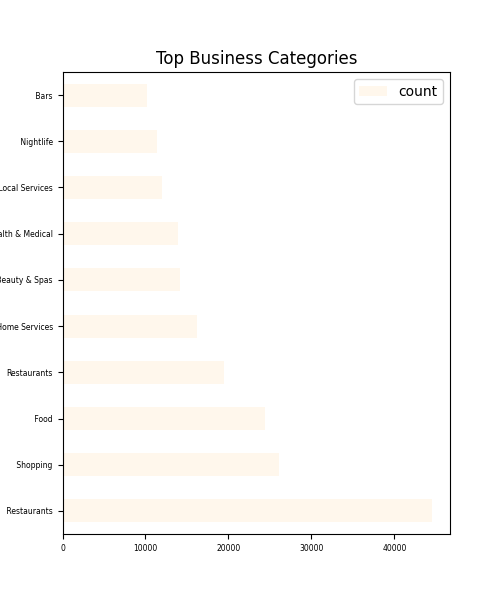

In [12]:
%matplot plt

![](https://raw.githubusercontent.com/BenitaDiop/students/master/bin/Cables.png)

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.***How true is this really?***

In [13]:
review = spark.read.load('s3://my-little-pony/yelp/reviews.json', 
                         format='json'
                        ).select("business_id", 
                                 "stars", 
                                 "review_id", 
                                 "user_id", 
                                 "text")
business = spark.read.load('s3://my-little-pony/yelp/yelp_academic_dataset_business.json', 
                           format = 'json'
                          ).select("business_id", 
                                   "stars")
review.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['business_id', 'stars', 'review_id', 'user_id', 'text']

In [14]:
review_sub = review.select("business_id", "stars", "user_id") 
review_sub.createOrReplaceTempView("review_Bsub_avg")
review_Bsub_avg = review_sub.groupBy("business_id"
                                    ).mean("stars"
                                          ).withColumnRenamed(
    "avg(stars)", 
    "avgRating")
review_sub.createOrReplaceTempView("review_Usub_avg")
review_Usub_avg = review_sub.groupBy("user_id").mean("stars").withColumnRenamed("avg(stars)", "avgRating")

review_Bsub_avg.show(5)
review_Usub_avg.show(5)

business.createOrReplaceTempView("business_sub_avg")
business_sub_avg = spark.sql("""
SELECT business_id as BID, 
avg(stars) as TotalRating
FROM biz 
GROUP BY business_id""")
business_sub_avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|         avgRating|
+--------------------+------------------+
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|ipFreSFhjClfNETuM...|               2.6|
|dLDMU8bOLnkDTmPUr...| 4.942857142857143|
|Qm2datcYBPXrPATVG...| 4.352941176470588|
+--------------------+------------------+
only showing top 5 rows

+--------------------+------------------+
|             user_id|         avgRating|
+--------------------+------------------+
|1Dul59QEe-Q-7OQHT...|              3.75|
|z2Gi5vo-8j544qN_g...|               4.5|
|CzkWUMIYDxUSetfCR...| 4.235294117647059|
|Uf_TVv1Z4s024jdI4...|               4.0|
|QSWr7Oivp0mClj_PR...|3.6666666666666665|
+--------------------+------------------+
only showing top 5 rows

+--------------------+-----------+
|                 BID|TotalRating|
+--------------------+-----------+
|DloBjCZHlz0lzsrQJ...|        4.0|
|RasF3XQRsFqfmY596...|        2.0|
|VHsNB3pdGVcRgs6C3.

In [15]:
tbl = review_Bsub_avg.join(business_sub_avg, 
                           business_sub_avg.BID == review_Bsub_avg.business_id,
                           "full"
                          ).drop('BID'
                                ).withColumnRenamed('business_id', 
                                                    'ID'
                                                   ).withColumnRenamed('avgRating', 'ReviewRating')

tbl.select("ReviewRating", "TotalRating").describe().show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+------------------+
|summary|      ReviewRating|       TotalRating|
+-------+------------------+------------------+
|  count|            209393|            209393|
|   mean| 3.534304236620268|3.5380552358483808|
| stddev|1.0152088475168217|1.0235430346225862|
|    min|               1.0|               1.0|
|    max|               5.0|               5.0|
+-------+------------------+------------------+

![](https://raw.githubusercontent.com/BenitaDiop/students/master/bin/Cables.png)

In [16]:
import numpy 
import scipy.stats
import matplotlib.pyplot as plt

df = tbl.toPandas()

g1 = numpy.array(df["ReviewRating"])
g2 = numpy.array(df["TotalRating"])
data  = (g1, g2 )

iters = 0
class HypothesisTesting(object): 
    
    def __init__(self, data): 
        self.data = data 
        self.MakeModel() 
        self.actual = self.TestStatistic(numpy.array(data))
        
        self.test_stat = None 
    
    def PValue(self, iters): 
        global count 
        if iters > 0:
            self.test_stat = numpy.array(
                [self.TestStatistic(self.RunModel()
                                   ) for _ in range(iters)
                ]
            )
                       
        return sum(self.test_stat >= self.actual) / len(self.test_stat)
    
    def MaxTestStat(self):
        for _ in range(1, iters):
            pass 
        return max([self.test_stat])            
            
    def TestStatistic(self, data): 
        pass
        
    def MakeModel(self): 
        pass 
    
    def RunModel(self): 
        pass 


class DiffMeansPermute(HypothesisTesting): 
    
    def TestStatistic(self, data): 
        group1, group2 = data 
        test_stat = abs(group1.mean() - group2.mean())
        
        return test_stat
    
    def MakeModel(self): 
        group1, group2 = self.data 
        self.n, self.m = len(group1), len(group2)
        self.pool = numpy.hstack((group1, group2))
        
    def RunModel(self): 
        numpy.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data     
    
    
    
    
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters = 1000)

print('\nAre Business and Reviews Average Ratings The Same or Skewed?')
print('p_value =', p_value)
print('actual =', ht.actual)
print('ts max =', max(ht.MaxTestStat()))

from numpy import *
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as p
stat = ht.test_stat
ys, xs, patches = plt.hist(stat, color='#ffff99')
x = [xs,xs]
X = abs(log10(x))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


Are Business and Reviews Average Ratings The Same or Skewed?
p_value = 0.214
actual = 0.0037509992281146154
ts max = 0.011005538931643244

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

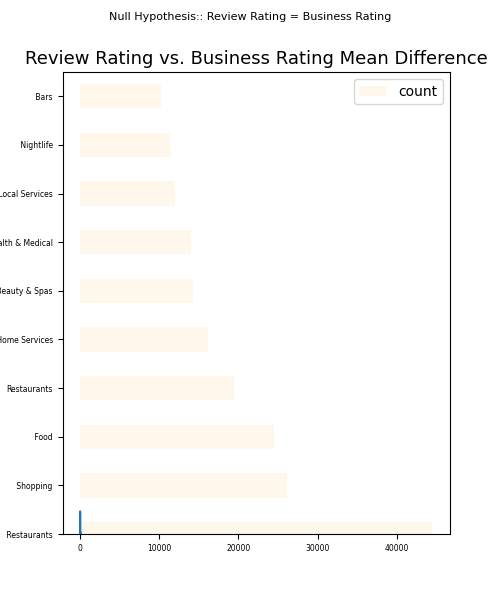

In [17]:
sns.distplot(X)
plt.title("Review Rating vs. Business Rating Mean Difference", fontsize= 13)
plt.suptitle("Null Hypothesis:: Review Rating = Business Rating", fontsize =8)
%matplot plt

![](https://raw.githubusercontent.com/BenitaDiop/students/master/bin/Cables.png)

# Should the Elite be Trusted? 
For the final portion - you have a choice:

Try and analyze some interesting dimension to this data. The ONLY requirement is that you must use the Users dataset and join on either the business* or reviews** dataset
Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.
Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

In [39]:
usr = spark.read.json("s3://my-little-pony/yelp/yelp_academic_dataset_user.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
view = spark.read.load('s3://my-little-pony/yelp/reviews.json', format='json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
usr.createOrReplaceTempView("usr")
query = """
SELECT 
name,
user_id as ID,
explode(split(elite, ',')),
elite
FROM usr"""
usr1 = spark.sql(query).withColumnRenamed("col", "year").drop("elite")
usr1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------------------+----+
|    name|                  ID|year|
+--------+--------------------+----+
|  Rafael|ntlvfPzc8eglqvk92...|    |
|Michelle|FOBRPlBHa3WPHFB5q...|2008|
|Michelle|FOBRPlBHa3WPHFB5q...|2009|
|Michelle|FOBRPlBHa3WPHFB5q...|2010|
|Michelle|FOBRPlBHa3WPHFB5q...|2011|
|Michelle|FOBRPlBHa3WPHFB5q...|2012|
|Michelle|FOBRPlBHa3WPHFB5q...|2013|
|  Martin|zZUnPeh2hEp0WydbA...|2010|
|    John|QaELAmRcDc5TfJEyl...|2009|
|    Anne|xvu8G900tezTzbbfq...|2009|
|    Anne|xvu8G900tezTzbbfq...|2010|
|    Anne|xvu8G900tezTzbbfq...|2011|
|    Anne|xvu8G900tezTzbbfq...|2012|
|    Anne|xvu8G900tezTzbbfq...|2014|
|    Anne|xvu8G900tezTzbbfq...|2015|
|    Anne|xvu8G900tezTzbbfq...|2016|
|    Anne|xvu8G900tezTzbbfq...|2017|
|    Anne|xvu8G900tezTzbbfq...|2018|
|   Steve|z5_82komKV3mI4ASG...|2007|
|  Stuart|ttumcu6hWshk_EJVW...|    |
+--------+--------------------+----+
only showing top 20 rows

In [42]:
import pyspark.sql.functions as f
# """"""""
usr.createOrReplaceTempView("csv")
query = """
SELECT *, 
explode(split(elite, ',')),
elite
FROM csv"""
csv =spark.sql(query)



view.show(5)

usr.columns
view.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|-MhfebM0QIsKt87iD...|   0|2015-04-15 05:21:16|    0|xQY8N_XvtGbearJ5X...|  2.0|As someone who ha...|     5|OwjRMXRC0KyPrIlcj...|
|lbrU8StCq3yDfr-QM...|   0|2013-12-07 03:16:52|    1|UmFMZ8PyXZTY2Qcwz...|  1.0|I am actually hor...|     1|nIJD_7ZXHq-FX8byP...|
|HQl28KMwrEKHqhFrr...|   0|2015-12-05 03:18:11|    0|LG2ZaYiOgpr2DK_90...|  5.0|I love Deagan's. ...|     1|V34qejxNsCbcgD8C0...|
|5JxlZaqCnk1MnbgRi...|   0|2011-05-27 05:30:52|    0|i6g_oA9Yf9Y31qt0w...|  1.0|Dismal, lukewarm,...|     0|ofKDkJKXSKZXu5xJN...|
|IS4cv902ykd8wj1TR...|   0|2017-01-14 21:56:57|    0|6TdNDKywdbjoTkize...|  4.0|Oh happy d

In [43]:
usr = usr1.groupBy("name", "ID").count().withColumnRenamed('count', 'YRSelite').sort("YRSelite", ascending=False)
usr.show(5)

usr = usr.withColumn('eliteSTAT', 
              f.when(usr.YRSelite > 1, 1).otherwise(0))
usr.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------+
|   name|                  ID|YRSelite|
+-------+--------------------+--------+
|  Geoff|CNdJaOdUjLIceVxhW...|      13|
|   Lisa|lufa4bHQd3XLYQE1z...|      13|
|Heather|h7cX02YMLzyobfZ7E...|      13|
| Carlos|nnImk681KaRqUVHlS...|      13|
|   Atif|cD_hpkvErXCyQHBQz...|      13|
+-------+--------------------+--------+
only showing top 5 rows

+------+--------------------+--------+---------+
|  name|                  ID|YRSelite|eliteSTAT|
+------+--------------------+--------+---------+
| Vicky|LPTq2-fZ9_TsG5o8l...|      13|        1|
|Miriam|gjhzKWsqCIrpEd9pe...|      13|        1|
|   Ann|08mOpJRCpZe3D8UHs...|      13|        1|
|Sherri|GpgBEengSGt1SDH67...|      13|        1|
|Cassie|2hMNc8G87MGYw4Pom...|      13|        1|
+------+--------------------+--------+---------+
only showing top 5 rows

In [44]:
from pyspark.sql import functions as f
from pyspark.sql.functions import rank, sum, col 
from pyspark.sql import Window 

window = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

t = usr.select(["YRSelite", "eliteSTAT"])\
            .groupBy('eliteSTAT')\
            .agg(f.count('YRSelite')\
                 .alias('Years_Num'), 
                 f.mean('YRSelite')\
                 .alias('Years_Avg'),
                 f.min('YRSelite')\
                 .alias('Years_Min'),
                 f.max('YRSelite')\
                 .alias('Years_Max'))\
.withColumn('total', sum(col('Years_Num')).over(window))\
.withColumn('Percent %', f.format_string("%5.0f%%\n", col('Years_Num')*100/col('total')))
tab = t.drop('Percent %').withColumn('Percent', col('Years_Num')*100/col('total'))
t.drop(col('total'))
t.show()
tab = tab.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+------------------+---------+---------+-------+---------+
|eliteSTAT|Years_Num|         Years_Avg|Years_Min|Years_Max|  total|Percent %|
+---------+---------+------------------+---------+---------+-------+---------+
|        1|    57230|3.7365367814083523|        2|       13|1968703|      3%
|
|        0|  1911473|               1.0|        1|        1|1968703|     97%
|
+---------+---------+------------------+---------+---------+-------+---------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

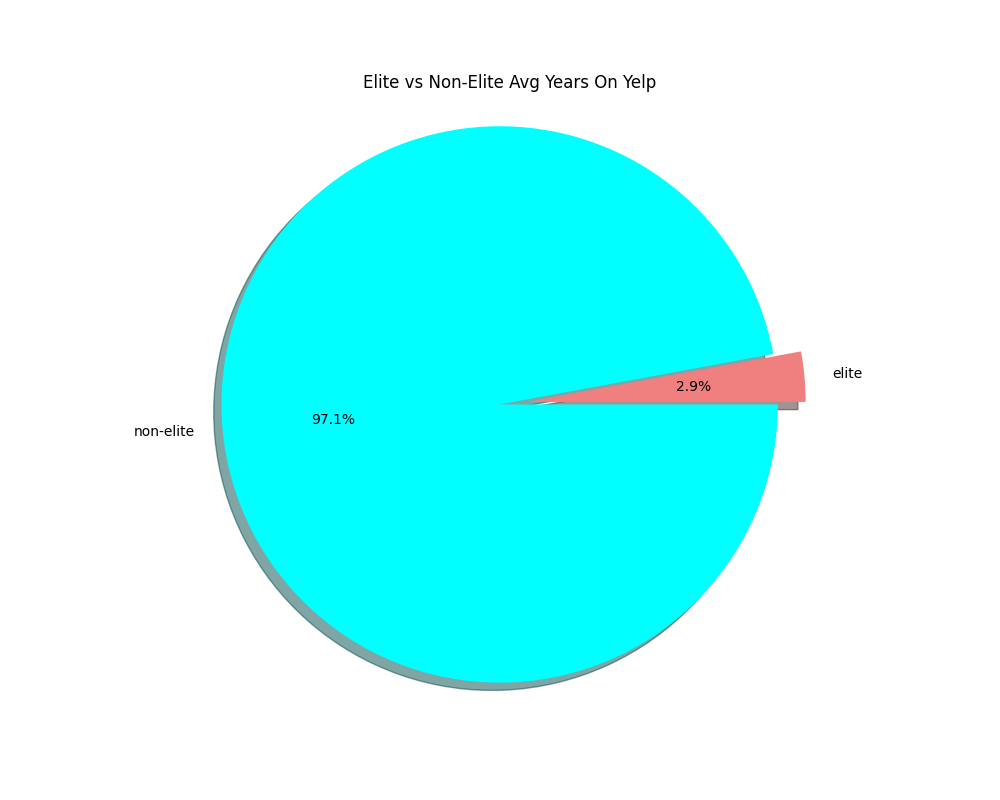

In [45]:
plot_data = pd.DataFrame(tab)
labels = plot_data.eliteSTAT
sizes = plot_data.Percent
colors = ('lightcoral', 'cyan')
explode = (0, 0.1)
plt.figure(figsize=(10, 8))

plt.pie(sizes, 
        explode=explode, 
        labels = ['elite', 'non-elite'], 
        colors = colors,
        autopct='%1.1f%%',
        shadow=True)
plt.title("Elite vs Non-Elite Avg Years On Yelp ")

plt.axis('equal')
plt.show()
%matplot plt

In [115]:
sub = csv.select("user_id", 
                 "fans", 
                 "cool", 
                 "useful", 
                 "average_stars" as "UserRating",
                "compliment_cool",
                "compliment_funny", 
                "compliment_hot",
                "compliment_more",
                "compliment_note",
                "compliment_plain", 
                "compliment_photos",
                "compliment_profile")
usr.createOrReplaceTempView("us")
us = usr.join(sub, usr.ID == sub.user_id, "full")
us = us.withColumnRenamed('compliment_cool', 'cc')\
       .withColumnRenamed('compliment_funny', 'cf')\
       .withColumnRenamed('compliment_profile', 'cpr')\
       .withColumnRenamed('compliment_note', 'cn')\
       .withColumnRenamed('compliment_more', 'cm')\
       .withColumnRenamed('compliment_photos', 'cph')\
       .withColumnRenamed('compliment_plain', 'cpl')\
       .withColumnRenamed('compliment_hot', 'ch').drop("user_id")

us.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
invalid syntax (<stdin>, line 5)
  File "<stdin>", line 5
    "average_stars" as "UserRating",
                     ^
SyntaxError: invalid syntax



In [109]:
view.createOrReplaceTempView("tmp2")
query = """
SELECT
user_id,
stars as ReviewRating,
business_id,
review_id,
text, 
date 
FROM tmp2
"""
tmp2 = spark.sql(query)
tmp2.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+--------------------+--------------------+--------------------+-------------------+
|             user_id|ReviewRating|         business_id|           review_id|                text|               date|
+--------------------+------------+--------------------+--------------------+--------------------+-------------------+
|OwjRMXRC0KyPrIlcj...|         2.0|-MhfebM0QIsKt87iD...|xQY8N_XvtGbearJ5X...|As someone who ha...|2015-04-15 05:21:16|
|nIJD_7ZXHq-FX8byP...|         1.0|lbrU8StCq3yDfr-QM...|UmFMZ8PyXZTY2Qcwz...|I am actually hor...|2013-12-07 03:16:52|
|V34qejxNsCbcgD8C0...|         5.0|HQl28KMwrEKHqhFrr...|LG2ZaYiOgpr2DK_90...|I love Deagan's. ...|2015-12-05 03:18:11|
|ofKDkJKXSKZXu5xJN...|         1.0|5JxlZaqCnk1MnbgRi...|i6g_oA9Yf9Y31qt0w...|Dismal, lukewarm,...|2011-05-27 05:30:52|
|UgMW8bLE0QMJDCkQ1...|         4.0|IS4cv902ykd8wj1TR...|6TdNDKywdbjoTkize...|Oh happy day, fin...|2017-01-14 21:56:57|
|5vD2kmE25YBrbayKh...|         5.0|nlxHRv1zXGT0c

In [110]:
expo = tmp2.join(us, us.ID == tmp2.user_id, "full")
expo.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+--------------------+--------------------+--------------------+-------------------+---------+--------------------+--------+---------+----+----+------+-------------+---+---+---+---+---+---+---+---+
|             user_id|ReviewRating|         business_id|           review_id|                text|               date|     name|                  ID|YRSelite|eliteSTAT|fans|cool|useful|average_stars| cc| cf| ch| cm| cn|cpl|cph|cpr|
+--------------------+------------+--------------------+--------------------+--------------------+-------------------+---------+--------------------+--------+---------+----+----+------+-------------+---+---+---+---+---+---+---+---+
|---RfKzBwQ8t3wu-L...|         5.0|Z3ZSar8IVAR2qIupq...|rv2EaVEP_cs0Yzc-z...|This pizza rules....|2018-01-13 04:09:32|    Jason|---RfKzBwQ8t3wu-L...|       1|        0|   0|   0|     0|          5.0|  0|  0|  0|  0|  0|  0|  0|  0|
|--I4wRDhmM2J2VLzK...|         2.0|JmI9nslLD7KZqRr__...|YQN6mfSAX12LFsn6

In [111]:
expo.createOrReplaceTempView("df")
query = """
(SELECT * FROM df)"""

df = spark.sql(query)
df = df.distinct()
df = df.dropDuplicates()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [112]:
import os
import sys

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [113]:
df.write.csv('data')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [114]:
df.coalesce(1).write.format("csv").option("header","true").save(write_uri)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [74]:
#target directory 
write_uri='/home/jovyan/work/workdir.csv'

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
expo.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+--------------------+--------------------+-------------------+------+--------------------+--------+---------+----+----+------+-------------+---+---+---+---+---+---+---+---+---+
|             user_id|stars|         business_id|           review_id|                text|               date|  name|                  ID|YRSelite|eliteSTAT|fans|cool|useful|average_stars| cc| cf| ch| cc| cm| cn|cpl|cph|cpr|
+--------------------+-----+--------------------+--------------------+--------------------+-------------------+------+--------------------+--------+---------+----+----+------+-------------+---+---+---+---+---+---+---+---+---+
|---RfKzBwQ8t3wu-L...|  5.0|Z3ZSar8IVAR2qIupq...|rv2EaVEP_cs0Yzc-z...|This pizza rules....|2018-01-13 04:09:32| Jason|---RfKzBwQ8t3wu-L...|       1|        0|   0|   0|     0|          5.0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
|--I4wRDhmM2J2VLzK...|  2.0|JmI9nslLD7KZqRr__...|YQN6mfSAX12LFsn6r...|Meh. Nothing spec...|2014-

In [28]:
colss = expo.columns 
colss

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['user_id', 'stars', 'business_id', 'review_id', 'text', 'date', 'name', 'ID', 'YRSelite', 'eliteSTAT', 'fans', 'cool', 'useful', 'average_stars', 'cc', 'cf', 'ch', 'cc', 'cm', 'cn', 'cpl', 'cph', 'cpr']

![](https://raw.githubusercontent.com/BenitaDiop/students/master/bin/Cables.png)

In [30]:
from pyspark.ml.feature import Tokenizer

tokenization=Tokenizer(inputCol='text',outputCol='tokens')

tokenized_df=tokenization.transform(expo)

tokenized_df.select("text", "tokens").show(5, False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
from pyspark.ml.feature import StopWordsRemover

stopword_removal=StopWordsRemover(inputCol='tokens',outputCol='refined_tokens')

refined_df=stopword_removal.transform(tokenized_df)

refined_df.select(['user_id','tokens','refined_tokens']).show(2,False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [47]:
from pyspark.ml.feature import CountVectorizer

count_vec=CountVectorizer(inputCol='refined_tokens',outputCol='features')

cv_df=count_vec.fit(refined_df).transform(refined_df)

cv_df.select(['user_id','refined_tokens','features']).show(4,False)

count_vec.fit(refined_df).vocabulary

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
from pyspark.ml.feature import HashingTF,IDF

hashing_vec=HashingTF(inputCol='refined_tokens',outputCol='tf_features')





VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…